# Import Library and Data

In [2]:
#mengimport library yang ingin digunakan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

#mengimport data yang ingin digunakan
df_can = pd.read_csv("london_crime_by_lsoa.csv")

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
#mengecek data 5 teratas
df_can.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [4]:
df_can.shape

(13490604, 7)

In [5]:
#mengecek data 5 paling bawah
df_can.tail()

lsoa_code     borough               major_category  \
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6

In [6]:
#mengecek tipe data
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
#Jumlah crime di tiap tahun
crime_year = df_can.groupby('year')['value'].sum()
print(crime_year)

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64


In [8]:
#Jumlah crime di tiap bulan
crime_month = df_can.groupby('month')['value'].sum()
print(crime_month)

month
1     530247
2     500537
3     551795
4     520648
5     552704
6     549041
7     563076
8     532784
9     522377
10    558252
11    549671
12    516626
Name: value, dtype: int64


In [9]:
#Jumlah crime di tiap major_category
crime_major = df_can.groupby('major_category')['value'].sum()
print(crime_major)

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64


In [10]:
#Jumlah crime di tiap minor_category
crime_minor = df_can.groupby('minor_category')['value'].sum()
print(crime_minor)

minor_category
Assault with Injury                       451001
Burglary in Other Buildings               263011
Burglary in a Dwelling                    491282
Business Property                          21295
Common Assault                            413690
Counted per Victim                          3840
Criminal Damage To Dwelling               154116
Criminal Damage To Motor Vehicle          265463
Criminal Damage To Other Building          66003
Drug Trafficking                           35819
Going Equipped                              5530
Handling Stolen Goods                      16100
Harassment                                458124
Motor Vehicle Interference & Tampering     56224
Murder                                       949
Offensive Weapon                           37983
Other Criminal Damage                     145356
Other Drugs                                 2998
Other Fraud & Forgery                       1485
Other Notifiable                          100819
Other

In [11]:
#Jumlah crime di tiap kota
crime_city = df_can.groupby('borough')['value'].sum()
print(crime_city)

#kota paling banyak crime
most_crime_city = crime_city.idxmax()
print(most_crime_city)

borough
Barking and Dagenham      149447
Barnet                    212191
Bexley                    114136
Brent                     227551
Bromley                   184349
Camden                    275147
City of London               780
Croydon                   260294
Ealing                    251562
Enfield                   193880
Greenwich                 181568
Hackney                   217119
Hammersmith and Fulham    185259
Haringey                  213272
Harrow                    116848
Havering                  138947
Hillingdon                209680
Hounslow                  186772
Islington                 230286
Kensington and Chelsea    171981
Kingston upon Thames       89306
Lambeth                   292178
Lewisham                  215137
Merton                    115654
Newham                    262024
Redbridge                 183562
Richmond upon Thames       96771
Southwark                 278809
Sutton                    100987
Tower Hamlets             228613
Wa

In [12]:
#Jumlah crime seluruhnya
total_crime = df_can['value'].sum()
print(f'Total number of crimes in the dataset: {total_crime}')

Total number of crimes in the dataset: 6447758


In [13]:
#memastikan tidak adanya missing value
df_can.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [14]:
df_can.describe()

value          year         month
count  1.349060e+07  1.349060e+07  1.349060e+07
mean   4.779444e-01  2.012000e+03  6.500000e+00
std    1.771513e+00  2.581989e+00  3.452053e+00
min    0.000000e+00  2.008000e+03  1.000000e+00
25%    0.000000e+00  2.010000e+03  3.750000e+00
50%    0.000000e+00  2.012000e+03  6.500000e+00
75%    1.000000e+00  2.014000e+03  9.250000e+00
max    3.090000e+02  2.016000e+03  1.200000e+01

# AREA PLOT

<Figure size 1400x800 with 0 Axes>

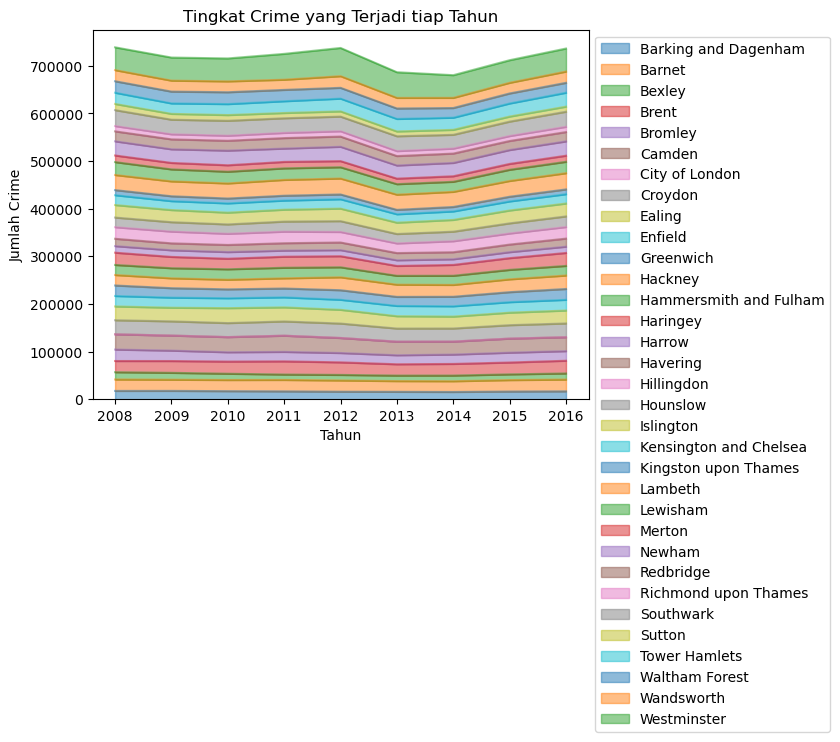

In [15]:
#Group data berdasarkan year dan borough, lalu menghitung total crime counts
yearly_borough_crime = df_can.groupby(['year', 'borough'])['value'].sum().unstack()

#Membuat area plot
plt.figure(figsize=(14, 8))
yearly_borough_crime.plot(kind='area', stacked=True, alpha=0.5)
plt.title('Tingkat Crime yang Terjadi tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Crime')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

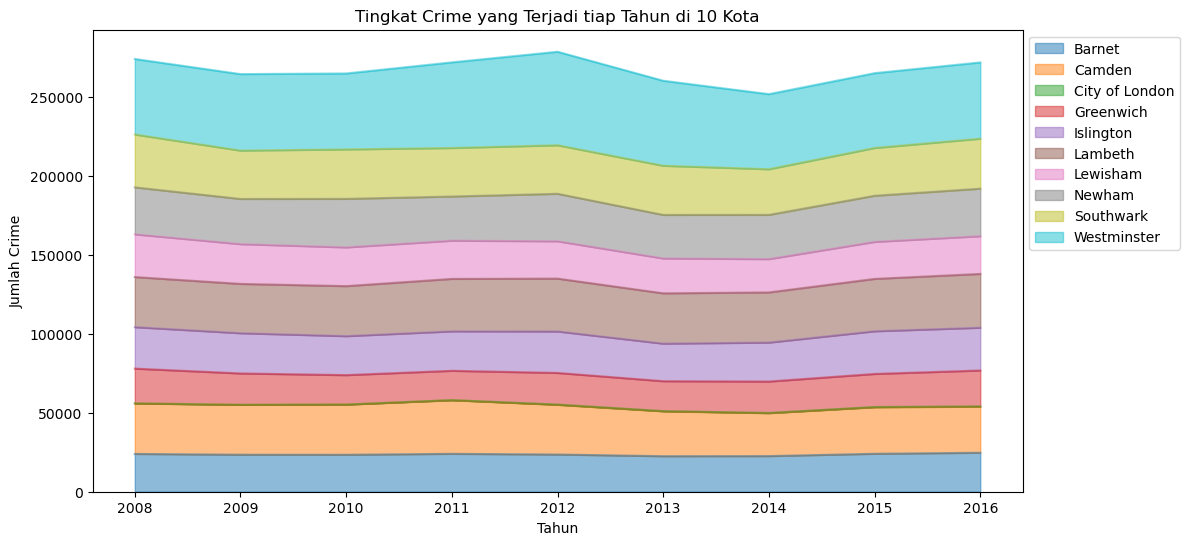

In [16]:
#Dilihat dari area plot di atas, jika kita mem-plot semua kota, tidak terlihat jelas hasilnya
#Hanya 10 city yang mau di-plot, karena kalau semua, tidak terlihat jelas di plot
borough_pilih = ['Barnet', 'Camden', 'City of London', 'Greenwich', 'Islington', 'Lambeth', 'Lewisham', 'Newham', 'Westminster', 'Southwark']

# Filter DataFrame berdasarkan borough yang dipilih
borough_pilih_crime = df_can[df_can['borough'].isin(borough_pilih)]

yearly_selected_boroughs_crime = borough_pilih_crime.groupby(['year', 'borough'])['value'].sum().unstack()

#Buat area plot
yearly_selected_boroughs_crime.plot(kind='area', stacked=True, alpha=0.5, figsize=(12,6))
plt.title('Tingkat Crime yang Terjadi tiap Tahun di 10 Kota')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Crime')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# HISTOGRAM

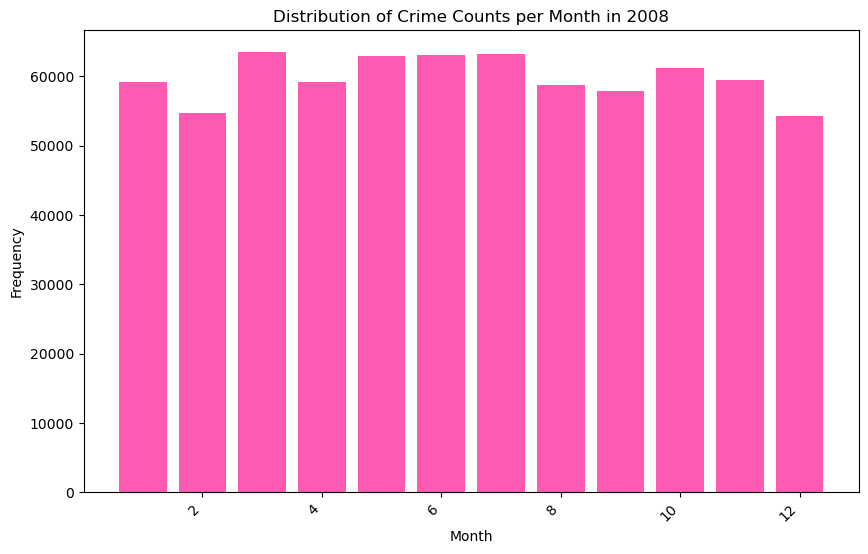

In [19]:
# Filter data for the year 2008
crime_2008 = df_can[df_can['year'] == 2008]

# Group data by month and calculate total crime counts
crime_by_month_2008 = crime_2008.groupby('month')['value'].sum()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(crime_by_month_2008.index, crime_by_month_2008, color='deeppink', alpha=0.7)

plt.title('Distribution of Crime Counts per Month in 2008')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Saya hanya mengambil data pada tahun 2008. Histogram ini bertujuan untuk menunjukkan distribusi frekuensi kejahatan yang terjadi setiap bulannya di tahun tersebut. Ternyata, tidak ada hubungan spesifik antara bulan dan frekuensinya, jadi tidak bisa dikatakan bahwa hubungan keduanya berbanding lurus atau berbanding terbalik. Histogram di atas memperlihatkan bahwa kejahatan paling banyak terjadi pada bulan ke-3, yaitu Maret 2008, sedangkan kejahatan paling sedikit terjadi pada bulan ke-12, Desember 2008.

# BAR CHART

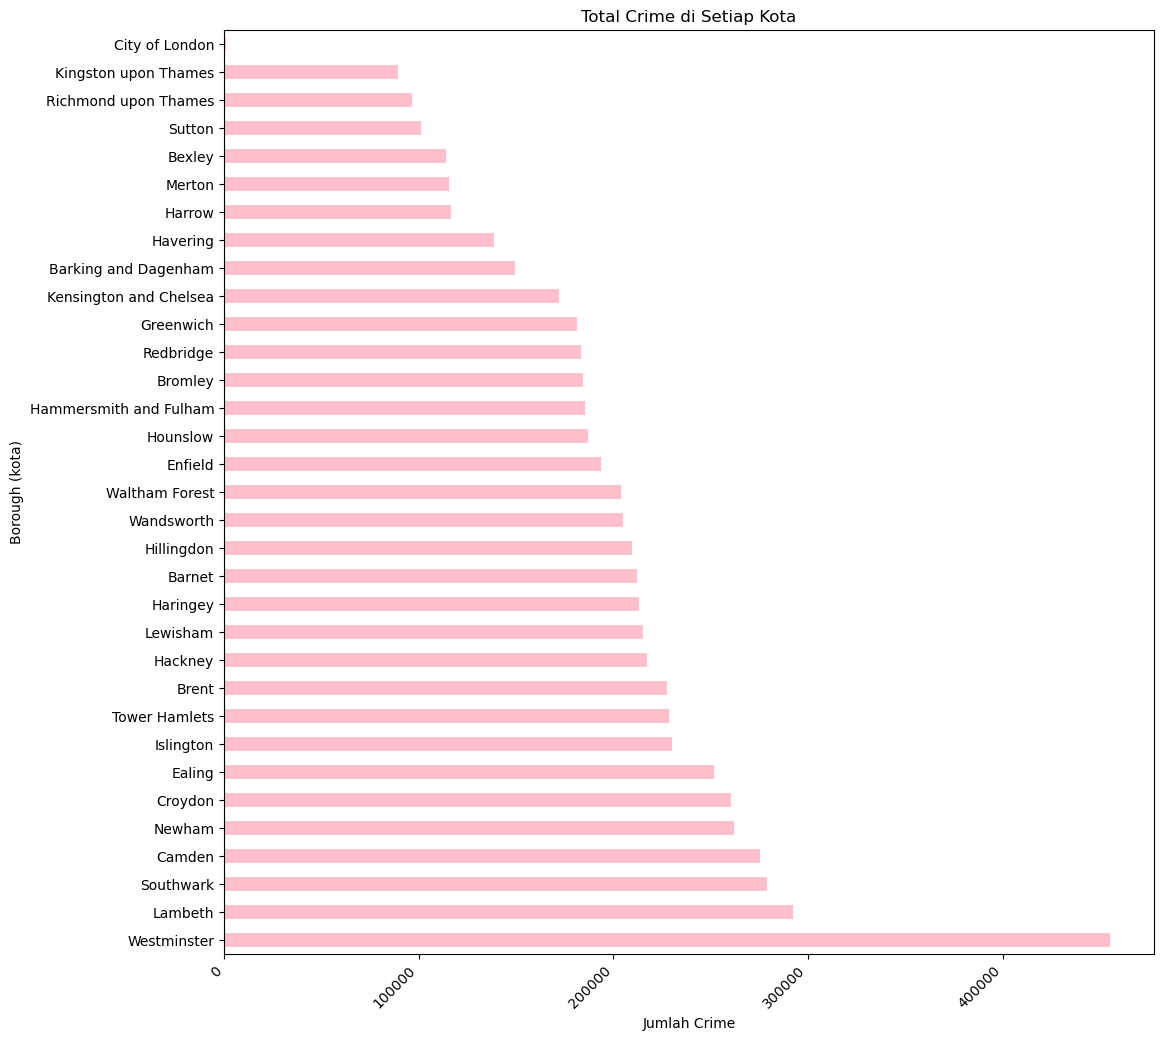

In [20]:
#Membuat bar chart
borough_crime_counts = df_can.groupby('borough')['value'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,12))
borough_crime_counts.plot(kind='barh', color='pink')
plt.title('Total Crime di Setiap Kota')
plt.ylabel('Borough (kota)')
plt.xlabel('Jumlah Crime')
plt.xticks(rotation=45, ha='right')
plt.show()

# PIE CHART

In [21]:
#Memfilter data di 2008 saja
crime_2008 = df_can[df_can['year'] == 2008]

# Group data berdasarkan borough dan hitung total crime counts
total_crime_by_borough_2008 = crime_2008.groupby('minor_category')['value'].sum()

# hasilnya
print(total_crime_by_borough_2008)

minor_category
Assault with Injury                       56586
Burglary in Other Buildings               31437
Burglary in a Dwelling                    56655
Business Property                          2964
Common Assault                            37356
Counted per Victim                         3840
Criminal Damage To Dwelling               23519
Criminal Damage To Motor Vehicle          41693
Criminal Damage To Other Building          9011
Drug Trafficking                           4203
Going Equipped                              621
Handling Stolen Goods                      2466
Harassment                                43389
Motor Vehicle Interference & Tampering     3868
Murder                                      130
Offensive Weapon                           5961
Other Criminal Damage                     17649
Other Drugs                                 373
Other Fraud & Forgery                      1485
Other Notifiable                           9491
Other Sexual             

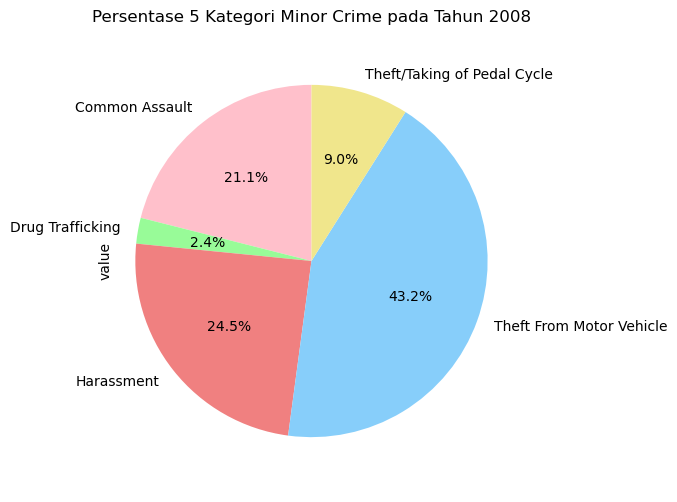

In [22]:
#Hanya 5 Kategori Crime Minor yang mau di-plot
borough_pilih = ['Drug Trafficking', 'Theft From Motor Vehicle', 'Theft/Taking of Pedal Cycle', 'Harassment', 'Common Assault']

borough_pilih_crime = df_can[df_can['minor_category'].isin(borough_pilih)]

borough_2008 = borough_pilih_crime[(borough_pilih_crime['year'] == 2008) & (borough_pilih_crime['minor_category'].isin(borough_pilih))]

borough_2008_total = borough_2008.groupby('minor_category')['value'].sum()

colors_list = ['pink', 'palegreen', 'lightcoral', 'lightskyblue', 'khaki']
borough_2008_total.plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            colors = colors_list,
                            shadow=False,)
plt.title('Persentase 5 Kategori Minor Crime pada Tahun 2008')
plt.axis('equal')
plt.show()

# BOX PLOT

# SCATTER PLOT

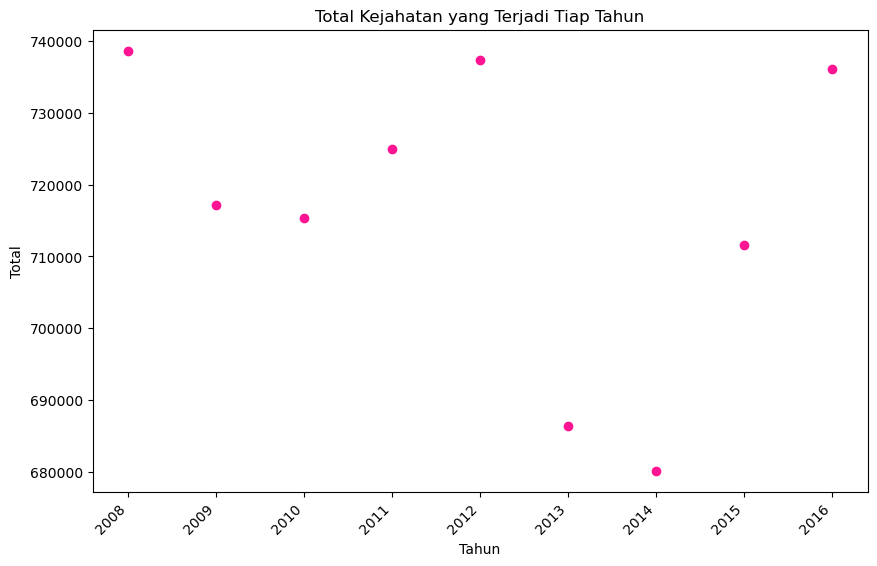

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

total_crime_by_year = df_can.groupby('year')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(total_crime_by_year['year'], total_crime_by_year['value'], c='deeppink')
plt.title('Total Kejahatan yang Terjadi Tiap Tahun')
plt.xlabel('Tahun')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total')
plt.show()

# Word Clouds

In [25]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is intalled and imported')

Wordcloud is intalled and imported


In [27]:
london_crime = open('london_crime_by_lsoa.csv', 'r').read()

print('File downloaded and saved!')

File downloaded and saved!


In [28]:
stopwords = set(STOPWORDS)

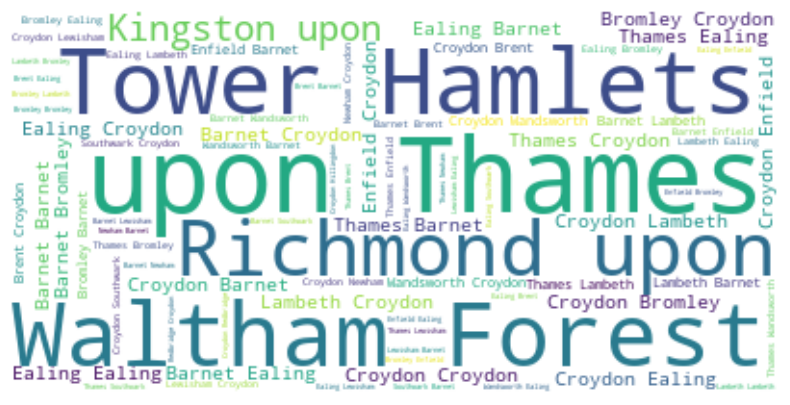

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# input file csv nya
df_can = pd.read_csv('london_crime_by_lsoa.csv')

# kombinasi kolom 'borough' column menjadi string
text_data = ' '.join(df_can['borough'].astype(str))

# buat objek WordCloud
london_crime_borough = WordCloud(
    background_color='white',
    max_words=1000,
    stopwords=STOPWORDS)

# Buat WordCloudnya
london_crime_borough.generate(text_data)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(london_crime_borough, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()

In [30]:
#saya ingin menampilkan WordCloudnya di peta london
from PIL import Image
london_map = np.array(Image.open('london_map.jpg'))
print('Image downloaded and saved!')

Image downloaded and saved!


<function matplotlib.pyplot.show(close=None, block=None)>

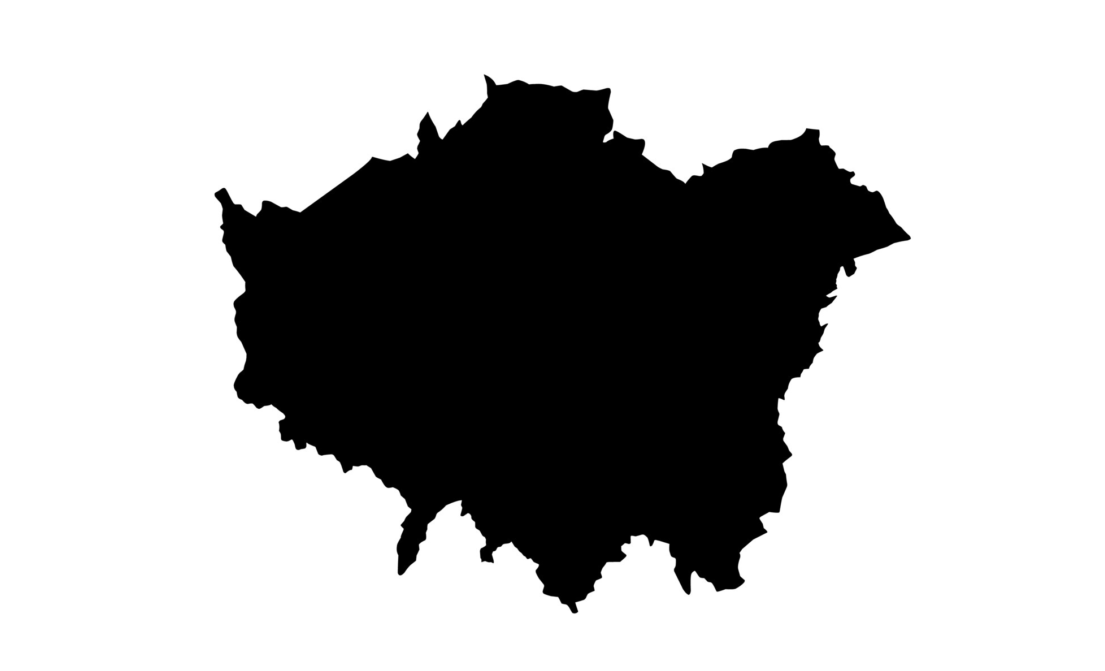

In [31]:
#memplot london_map.jpg
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(london_map, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

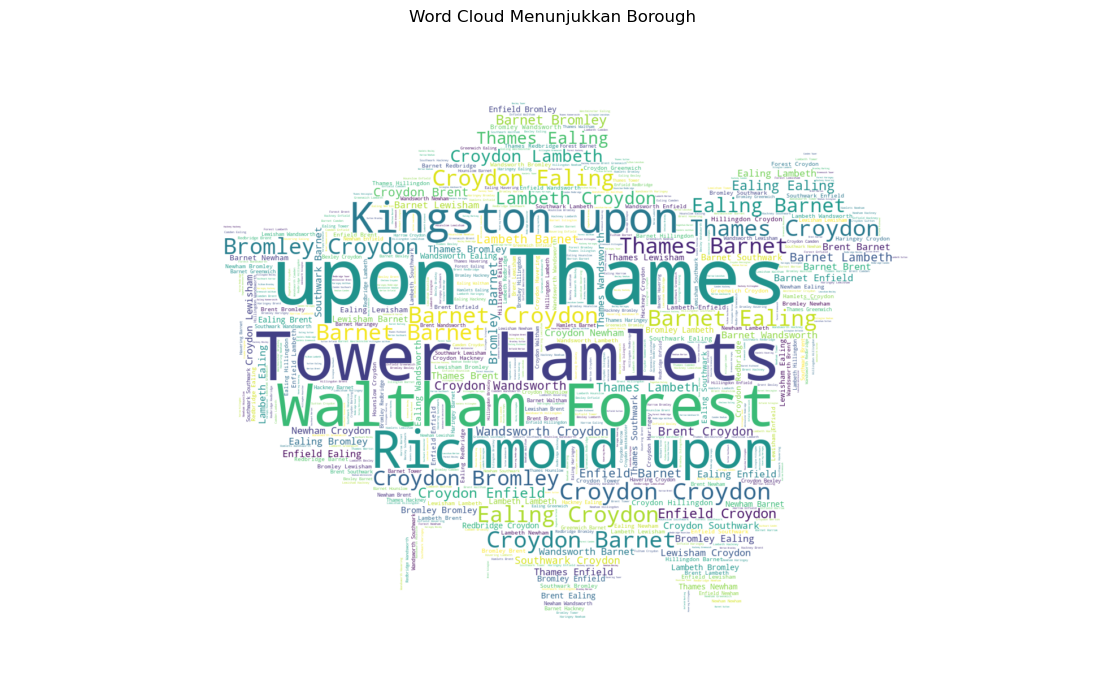

In [32]:
#memplot hasil WordCloud ke london_map
london_crime_borough = WordCloud(background_color = 'white', max_words=1000, mask=london_map, stopwords=stopwords)

london_crime_borough.generate(text_data)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(london_crime_borough, interpolation='bilinear')
plt.title('Word Cloud Menunjukkan Borough')
plt.axis('off')
plt.show

# Folium Maps

In [33]:
#download library folium
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [34]:
#setelah di-download, di-import
import folium

In [35]:
#membuat peta dunia di folium
world_map = folium.Map()

world_map

In [36]:
#meng-input data csv
df_can = pd.read_csv('london_crime_by_lsoa.csv')

In [37]:
#memilih hanya data di tahun 2008
df_2008 = df_can[df_can['year'] == 2008]

#lalu, menghitung jumlah crime di tahun 2008
borough_crime_counts_2008 = df_2008.groupby('borough').sum()['value'].reset_index()

C:\Users\Shafa\AppData\Local\Temp\ipykernel_63412\2249546671.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_crime_counts_2008 = df_2008.groupby('borough').sum()['value'].reset_index()


In [38]:
#karena data yang banyak, saya hanya ingin membatasi dengan 1000 data saja
limit=1000
df_2008 = df_2008.iloc[0:limit, :]

In [39]:
#membuat peta London dengan titik koordinat yang sesuai
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=10)
london_map

In [40]:
#mengecek data apakah sudah benar
df_2008.head()

lsoa_code      borough               major_category  \
4   E01004563   Wandsworth                      Robbery   
33  E01032741     Havering  Violence Against the Person   
34  E01002533   Hillingdon  Violence Against the Person   
46  E01004678  Westminster              Criminal Damage   
54  E01000455       Bexley           Theft and Handling   

                   minor_category  value  year  month  
4               Personal Property      0  2008      6  
33                     Harassment      0  2008      1  
34               Offensive Weapon      0  2008     10  
46          Other Criminal Damage      0  2008     11  
54  Theft/Taking Of Motor Vehicle      1  2008      5

In [41]:
#mengecek jumlah atau ukuran data yang akan digunakan
df_2008.shape

(1000, 7)

In [42]:
#saya ingin membuat banyak titik di peta London dengan menunjukan banyaknya crime yang terjadi di setiap Borough pada tahun 2008
#membuat variabel koordinat tiap Borough
koordinat = {
    'Barking and Dagenham': (51.5541, 0.1340),
    'Barnet': (51.6252, -0.1517),
    'Bexley': (51.4549, 0.1505),
    'Brent': (51.5588, -0.2817),
    'Bromley': (51.4039, 0.0198),
    'Camden': (51.5290, -0.1255),
    'City of London': (51.5155, -0.0922),
    'Croydon': (51.3762, -0.0982),
    'Ealing': (51.5130, -0.3089),
    'Enfield': (51.6538, -0.0799),
    'Greenwich': (51.4892, 0.0648),
    'Hackney': (51.5450, -0.0553),
    'Hammersmith and Fulham': (51.4927, -0.2339),
    'Haringey': (51.6000, -0.1119),
    'Harrow': (51.5898, -0.3346),
    'Havering': (51.5812, 0.1837),
    'Hillingdon': (51.5441, -0.4760),
    'Hounslow': (51.4746, -0.3680),
    'Islington': (51.5416, -0.1022),
    'Kensington and Chelsea': (51.5020, -0.1947),
    'Kingston upon Thames': (51.4085, -0.3064),
    'Lambeth': (51.4607, -0.1163),
    'Lewisham': (51.4452, -0.0209),
    'Merton': (51.4014, -0.1958),
    'Newham': (51.5077, 0.0469),
    'Redbridge': (51.5590, 0.0741),
    'Richmond upon Thames': (51.4479, -0.3260),
    'Southwark': (51.5035, -0.0804),
    'Sutton': (51.3618, -0.1945),
    'Tower Hamlets': (51.5099, -0.0059),
    'Waltham Forest': (51.5908, -0.0134),
    'Wandsworth': (51.4567, -0.1910),
    'Westminster': (51.4975, -0.1357)
}

#membuat data frame berisi titik koordinat tadi
borough_df = pd.DataFrame(list(koordinat.items()), columns=['borough', 'latitude_longitude'])

#memisahkan titik koordinat menjadi dua, yaitu latitude dan longitude
borough_df[['Y', 'X']] = pd.DataFrame(borough_df['latitude_longitude'].tolist(), index=borough_df.index)

#drop kolom latitude_longitude
borough_df = borough_df.drop(columns=['latitude_longitude'])

#menyatukan crime_data dengan borough_df pada kolom borough'
merged_data = pd.merge(df_2008, borough_df, on='borough')

In [43]:
#mengecek data baru, yaitu merged_data
merged_data.head()

lsoa_code     borough   major_category                    minor_category  \
0  E01004563  Wandsworth          Robbery                 Personal Property   
1  E01004642  Wandsworth            Drugs               Possession Of Drugs   
2  E01004593  Wandsworth         Burglary            Burglary in a Dwelling   
3  E01004562  Wandsworth  Criminal Damage             Other Criminal Damage   
4  E01004541  Wandsworth  Criminal Damage  Criminal Damage To Motor Vehicle   

   value  year  month        Y      X  
0      0  2008      6  51.4567 -0.191  
1      1  2008      6  51.4567 -0.191  
2      0  2008     10  51.4567 -0.191  
3      0  2008      3  51.4567 -0.191  
4      0  2008     12  51.4567 -0.191

In [44]:
merged_data.tail()

lsoa_code         borough               major_category  \
995  E01003365          Merton                      Robbery   
996  E01003408          Merton  Violence Against the Person   
997  E01003460          Merton           Theft and Handling   
998  E01032740  City of London  Violence Against the Person   
999  E01000001  City of London                        Drugs   

        minor_category  value  year  month        Y       X  
995  Personal Property      0  2008      9  51.4014 -0.1958  
996     Common Assault      1  2008      5  51.4014 -0.1958  
997   Theft From Shops      0  2008      9  51.4014 -0.1958  
998         Harassment      0  2008      8  51.5155 -0.0922  
999   Drug Trafficking      0  2008      7  51.5155 -0.0922

In [45]:
#visualisasi total crime pada peta London
latitude = 51.509865
longitude =  -0.118092

In [46]:
#membuat folium map
crimes = folium.map.FeatureGroup()

for lat, lng in zip(merged_data.Y, merged_data.X):
    crimes.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6)
    )

london_map.add_child(crimes)

In [47]:
#menambah teks popup
crimes = folium.map.FeatureGroup()

for lat, lng in zip(merged_data.Y, merged_data.X):
    crimes.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6)
    )

latitudes = list(merged_data.Y)
longitudes = list(merged_data.X)
labels = list(merged_data.minor_category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(london_map)
    
london_map.add_child(crimes)

In [48]:
#menambah angka banyaknya crime yang terjadi di setiap borough
from folium import plugins

crimes = plugins.MarkerCluster().add_to(london_map)

for lat, lng, label in zip(merged_data.Y, merged_data.X, merged_data.minor_category):
        folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
    ).add_to(crimes)

london_map